In [1]:
import pandas as pd

# Cargar todas las hojas del archivo Excel en un diccionario
xls = pd.ExcelFile('cap_2015-2020.xlsx')

# Leer cada hoja y almacenarlas en una lista
dfs = [xls.parse(sheet_name) for sheet_name in xls.sheet_names]

# Concatenar todas las DataFrames en uno solo
df_pandas = pd.concat(dfs, ignore_index=True)

df_pandas.head(5)

,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Fenologia,Superficie_ha,...,Adultos_Brote_4,Ninfas_Brote_4,Variedad,noProductores,Incidencia_Psilido,Fenologia_Brote_1,Fenologia_Brote_2,Fenologia_Brote_3,Fenologia_Brote_4,Tecnico
0,2015-02-25,24.05563,-99.13250,177_THUE05-28-013-0114T05,GUEMEZ,Ej. Guadalupe Victoria,ESPARZA_NAVARRO_JOSE,NARANJA,FRUCTIFICACIÓN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-25,24.05563,-99.13852,177_THUE05-28-013-0114T16,GUEMEZ,Ej. Guadalupe Victoria,ESPARZA_NAVARRO_JOSE,NARANJA,FRUCTIFICACIÓN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-11,24.05563,-99.13250,177_THUE05-28-013-0114T05,GUEMEZ,Ej. Guadalupe Victoria,ESPARZA_NAVARRO_JOSE,NARANJA,FRUCTIFICACIÓN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-02-18,24.05563,-99.13250,177_THUE05-28-013-0114T05,GUEMEZ,Ej. Guadalupe Victoria,ESPARZA_NAVARRO_JOSE,NARANJA,FRUCTIFICACIÓN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-04,24.05563,-99.13250,177_THUE05-28-013-0114T05,GUEMEZ,Ej. Guadalupe Victoria,ESPARZA_NAVARRO_JOSE,NARANJA,FRUCTIFICACIÓN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes
de los años 2015, 2017,2020. Es decir una gráfica por cada año donde
el eje horizontal esté el mes y el vertical el promedio de diaphorinas por
trampa.


In [2]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397256 entries, 0 to 1397255
Data columns (total 32 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Fecha                  1397256 non-null  datetime64[ns]
 1   Latitud                1397256 non-null  float64       
 2   Longitud               1397256 non-null  float64       
 3   Ubicacion              1397256 non-null  object        
 4   Municipio              1283756 non-null  object        
 5   Comunidad              1186459 non-null  object        
 6   Productor              1283756 non-null  object        
 7   Cultivo                1283756 non-null  object        
 8   Fenologia              1186212 non-null  object        
 9   Superficie_ha          1397256 non-null  float64       
 10  No_Trampas_Instaladas  1283756 non-null  float64       
 11  No_Trampas_Revisadas   1397256 non-null  int64         
 12  No_DiaphorinasXtrampa  13670

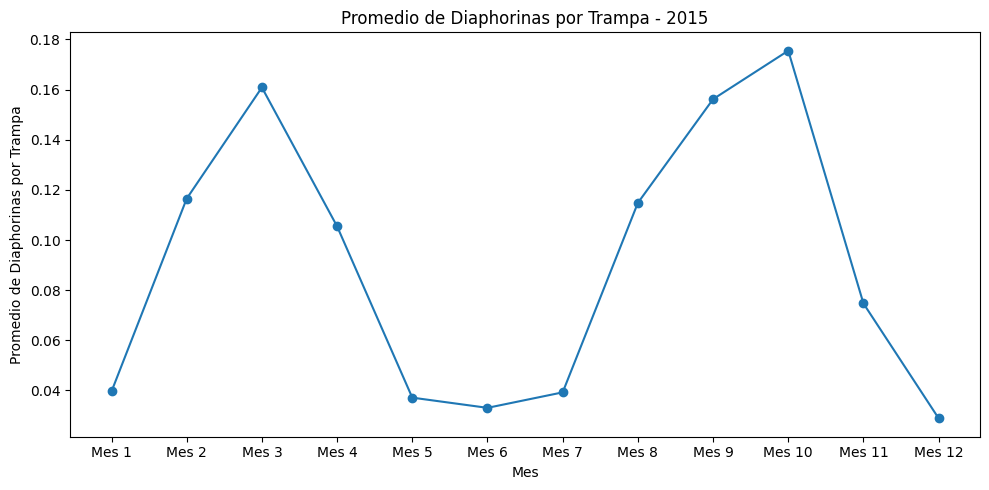

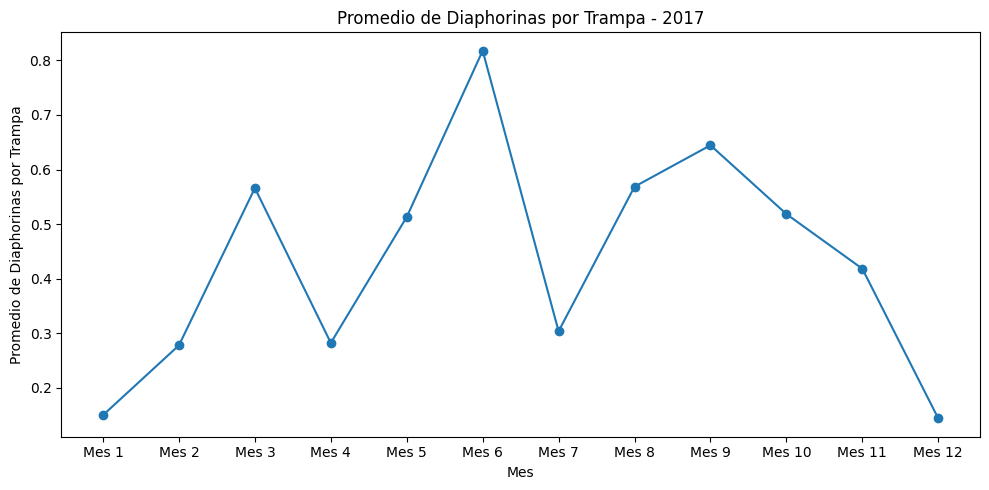

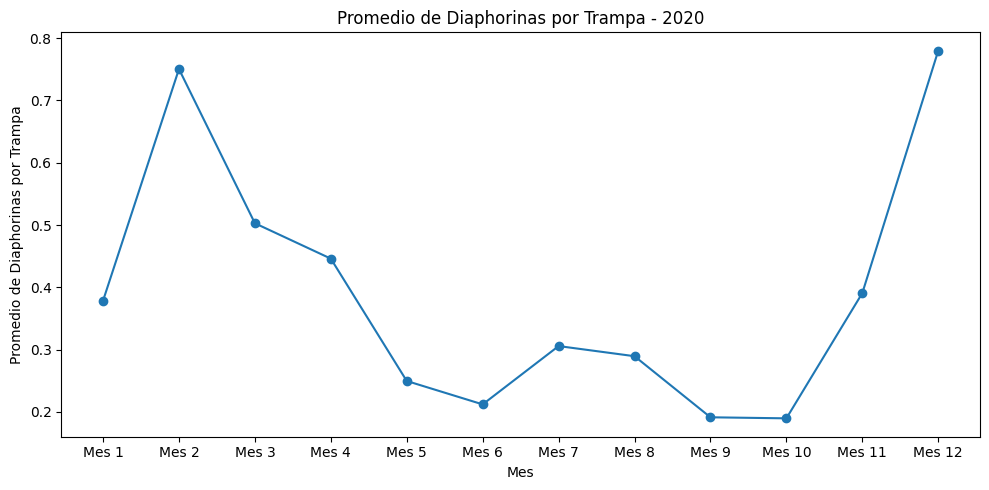

In [3]:
df_pandas['Fecha'] = pd.to_datetime(df_pandas['Fecha'])

# Extraer el año
df_pandas['Año'] = df_pandas['Fecha'].dt.year

# Filtrar solo los años de interés
df_filtrado = df_pandas[df_pandas['Año'].isin([2015, 2017, 2020])]

# Calcular el promedio por año y mes
promedios = df_filtrado.groupby(['Año', 'Mes'])['No_DiaphorinasXtrampa'].mean().reset_index()

import matplotlib.pyplot as plt

# Crear gráficas para cada año
for año in promedios['Año'].unique():
    data_año = promedios[promedios['Año'] == año]
    
    plt.figure(figsize=(10, 5))
    plt.plot(data_año['Mes'], data_año['No_DiaphorinasXtrampa'], marker='o')
    plt.title(f'Promedio de Diaphorinas por Trampa - {año}')
    plt.xlabel('Mes')
    plt.ylabel('Promedio de Diaphorinas por Trampa')
    plt.xticks(ticks=data_año['Mes'], labels=[f'Mes {int(m)}' for m in data_año['Mes']])
    plt.tight_layout()
    plt.show()

2. Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes
del año 2020 pero sólo de un municipio.


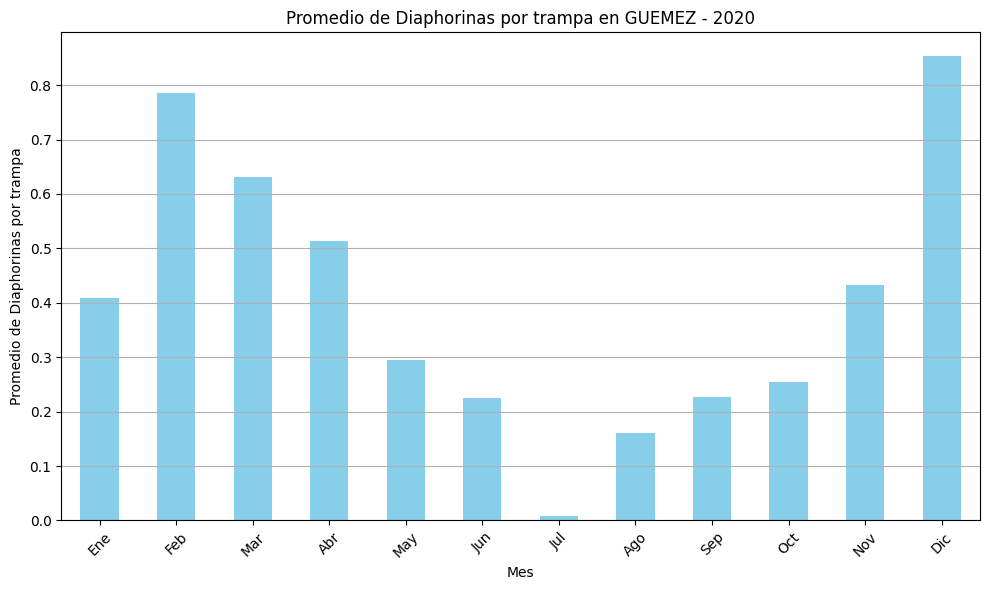

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filtrar el DataFrame
municipio_deseado = 'GUEMEZ'  # Reemplaza con el nombre de tu municipio
df_filtered = df_pandas[(df_pandas['Municipio'] == municipio_deseado) & (df_pandas['Fecha'].dt.year == 2020)]

# 2. Extraer el mes y agregarlo al DataFrame filtrado
df_filtered.loc[:, 'Mes'] = df_filtered['Fecha'].dt.month  # Usar .loc para evitar el warning

# Agrupar por mes y calcular el promedio de No_DiaphorinasXtrampa
promedio_diaphorinas = df_filtered.groupby('Mes')['No_DiaphorinasXtrampa'].mean()

# 3. Graficar
plt.figure(figsize=(10, 6))
promedio_diaphorinas.plot(kind='bar', color='skyblue')
plt.title(f'Promedio de Diaphorinas por trampa en {municipio_deseado} - 2020')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas por trampa')
plt.xticks(range(12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


3. Hacer una tabla donde la primera columna sea el mes, la segunda el índice Id (por trampa) y la tercera el índice Cx para el año 2015.

In [5]:
import pandas as pd

# Paso 1: Filtrar datos para el año 2015
df_2015 = df_pandas[df_pandas['Fecha'].dt.year == 2015].copy()  # Hacer una copia

# Paso 2: Agregar una columna para el mes
#df_2015['Mes'] = df_2015['Fecha'].dt.month

# Paso 3: Agrupar por mes y ubicación
grouped = df_2015.groupby(['Mes', 'Ubicacion'])['No_DiaphorinasXtrampa'].agg(['mean', 'var', 'sum'])

# Renombrar las columnas para facilitar el acceso
grouped.rename(columns={'mean': 'xbar', 'var': 'var', 'sum': 'sumx'}, inplace=True)

# Paso 4: Calcular Id y Cx
grouped['Id'] = grouped['var'] / grouped['xbar']
grouped['Cx'] = (grouped['Id'] - 1) / (grouped['sumx'] - 1)

# Paso 5: Crear la tabla final
result = grouped.reset_index()[['Mes', 'Id', 'Cx']]

# Visualizar resultados
print(result)


       Mes  Id  Cx
0        1 NaN NaN
1        1 NaN NaN
2        1 NaN NaN
3        1 NaN NaN
4        1 NaN NaN
...    ...  ..  ..
97236   12 NaN NaN
97237   12 NaN NaN
97238   12 NaN NaN
97239   12 NaN NaN
97240   12 NaN NaN

[97241 rows x 3 columns]


In [6]:
dd=pd.DataFrame(result)
dd.describe()

/usr/local/lib/python3.9/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Mes,Id,Cx
count,97241.000000,12540.000000,7562.000000
mean,6.611131,1.788688,inf
std,3.535577,2.066156,NaN
min,1.000000,0.000000,-0.500000
25%,4.000000,1.000000,0.166667
50%,7.000000,1.000000,1.000000
75%,10.000000,2.000000,1.000000
max,12.000000,52.875000,inf


4.  Hacer una gráfica del índice Id (por trampa) como función del mes que abarque desde 2015 hasta 2020.

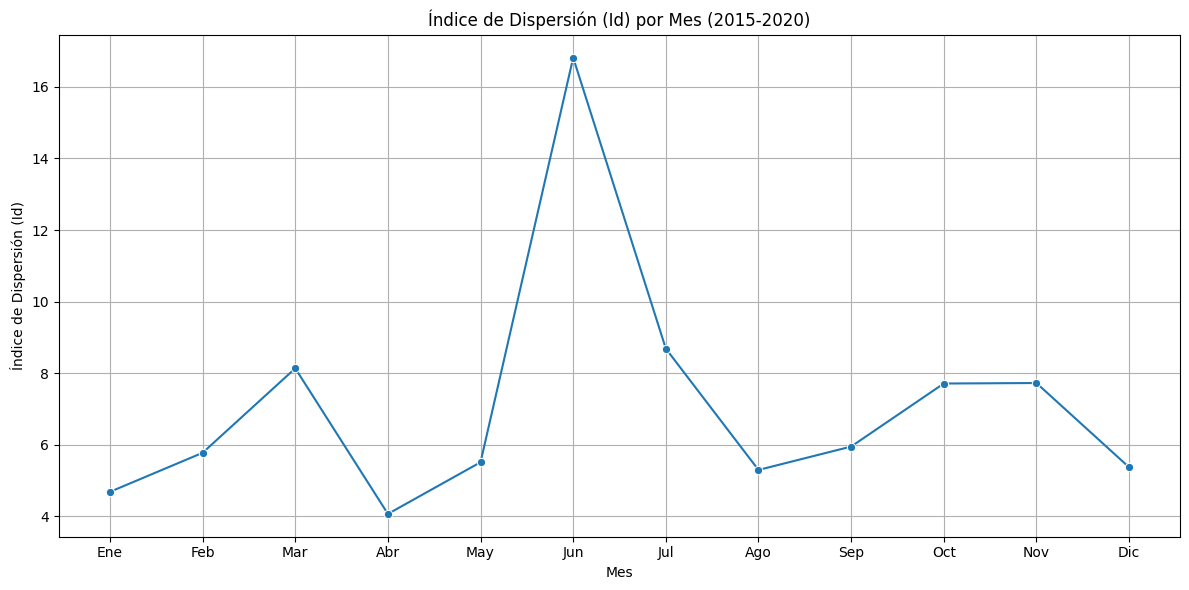

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'Fecha' está en formato datetime y extrae el mes.
df_pandas['Mes'] = df_pandas['Fecha'].dt.month

# Eliminar filas con valores nulos en la columna de interés.
df_filtered = df_pandas.dropna(subset=['No_DiaphorinasXtrampa'])

# Agrupar solo por 'Mes', y calcular la media y varianza.
stats = df_filtered.groupby('Mes')['No_DiaphorinasXtrampa'].agg(['mean', 'var']).reset_index()

# Calcular el índice Id.
stats['Id'] = stats['var'] / stats['mean']

# Graficar el índice Id por mes.
plt.figure(figsize=(12, 6))
sns.lineplot(data=stats, x='Mes', y='Id', marker='o')
plt.title('Índice de Dispersión (Id) por Mes (2015-2020)')
plt.xlabel('Mes')
plt.ylabel('Índice de Dispersión (Id)')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()  # Mejora el diseño
plt.show()

5. Hacer una gráfica del centro de masa de las diaphorinas como función
del mes que abarque de 2017 a 2020. Nota : CM=pos*Diaph/Ntrampas,
donde CM se refiere al centro de masa, pos es la posición de la trampa,
Diaph es el promedio de diaphorinas en la trampa y Ntrampas es el número
de trampas que se consideraron en el cálculo.

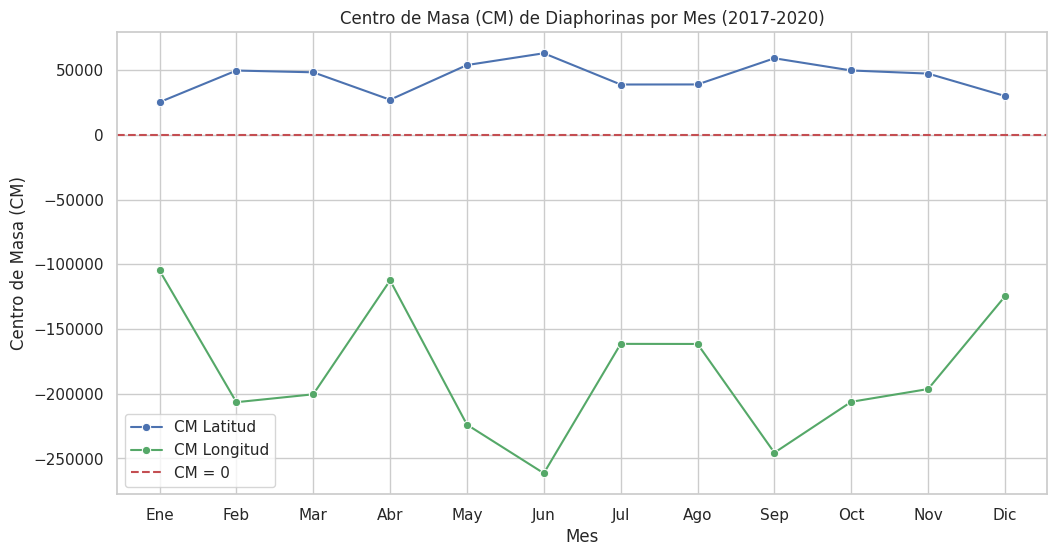

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna de fechas esté en formato datetime
df_pandas['Fecha'] = pd.to_datetime(df_pandas['Fecha'])

# Filtrar datos entre 2017 y 2020
df_pandas['Año'] = df_pandas['Fecha'].dt.year
filtered_data = df_pandas[(df_pandas['Año'] >= 2017) & (df_pandas['Año'] <= 2020)].copy()  # Usar .copy()

# Agregar una columna para el mes
filtered_data.loc[:, 'Mes'] = filtered_data['Fecha'].dt.month  # Usar .loc[]

# Calcular el promedio de Diaphorinas por ubicación, mes, latitud y longitud
promedios = filtered_data.groupby(['Ubicacion', 'Mes', 'Latitud', 'Longitud'])['No_DiaphorinasXtrampa'].mean().reset_index()

# Contar el número de trampas por ubicación y mes
num_trampas = filtered_data.groupby(['Ubicacion', 'Mes']).size().reset_index(name='Ntrampas')

# Unir promedios y número de trampas
cm_data = pd.merge(promedios, num_trampas, on=['Ubicacion', 'Mes'])

# Calcular el centro de masa (CM) para latitud y longitud por separado
cm_data['CM_Latitud'] = (cm_data['Latitud'] * cm_data['No_DiaphorinasXtrampa']) / cm_data['Ntrampas']
cm_data['CM_Longitud'] = (cm_data['Longitud'] * cm_data['No_DiaphorinasXtrampa']) / cm_data['Ntrampas']

# Agrupar para obtener el CM total por mes para latitud y longitud
cm_latitud_total = cm_data.groupby('Mes')['CM_Latitud'].sum().reset_index()
cm_longitud_total = cm_data.groupby('Mes')['CM_Longitud'].sum().reset_index()

# Unir ambos resultados
cm_total = pd.merge(cm_latitud_total, cm_longitud_total, on='Mes')

# Configura el estilo de la gráfica
sns.set(style="whitegrid")

# Graficar el CM por mes para latitud y longitud usando sns.lineplot
plt.figure(figsize=(12, 6))

# Graficar CM de Latitud
sns.lineplot(data=cm_total, x='Mes', y='CM_Latitud', marker='o', label='CM Latitud', color='b')

# Graficar CM de Longitud
sns.lineplot(data=cm_total, x='Mes', y='CM_Longitud', marker='o', label='CM Longitud', color='g')

# Personalizar la gráfica
plt.title('Centro de Masa (CM) de Diaphorinas por Mes (2017-2020)')
plt.xlabel('Mes')
plt.ylabel('Centro de Masa (CM)')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.axhline(y=0, color='r', linestyle='--', label='CM = 0')
plt.legend()
plt.show()
